#Time Series Analysis on Covid - 19 using dummy data.

Importing Required Libraries

In [1]:
#importing required libraried
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

Mounting the drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Github_projects/Covid data/covid_data.csv - Sheet1.csv', parse_dates=['date'], index_col='date')

Resample the data to daily frequency

In [5]:
# Resample the data to daily frequency
df_daily = df.resample('D').sum()

 Visualizing the time series                                                                                                                                                                                                                                                                                                       

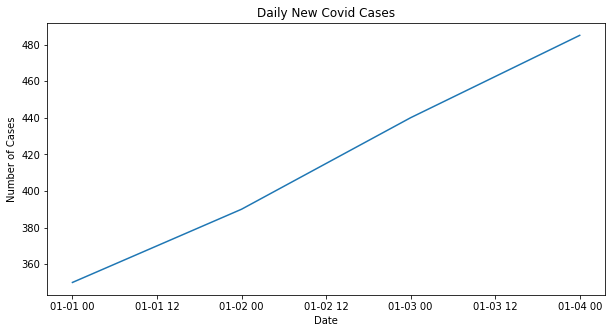

In [6]:
# Visualize the time series
plt.figure(figsize=(10,5))
plt.plot(df_daily.index, df_daily['new_cases'])
plt.title('Daily New Covid Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

Check the stationarity of the time series using Augmented Dickey-Fuller test

In [7]:
# Check the stationarity of the time series using Augmented Dickey-Fuller test
result = adfuller(df_daily['new_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.4948716593053929
p-value: 0.9847163882019033
Critical Values:
	1%: -10.41719074074074
	5%: -5.77838074074074
	10%: -3.391681111111111


Fitting an ARIMA model to the time series

In [8]:
# Fit an ARIMA model to the time series
model = ARIMA(df_daily['new_cases'], order=(1,1,0))
model_fit = model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Print the model summary

In [9]:
# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              new_cases   No. Observations:                    4
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -12.122
Date:                Wed, 01 Mar 2023   AIC                             28.245
Time:                        11:45:02   BIC                             26.442
Sample:                    01-01-2022   HQIC                            24.621
                         - 01-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9829      0.300      3.280      0.001       0.396       1.570
sigma2        61.8518    280.498      0.221      0.825    -487.914     611.618
Ljung-Box (L1) (Q):                   0.71   Jarque-

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3098: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Early subset of data for variable %d'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3103: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  warnings.warn('Later subset of data for variable %d'


Plot the residuals of the fitted model



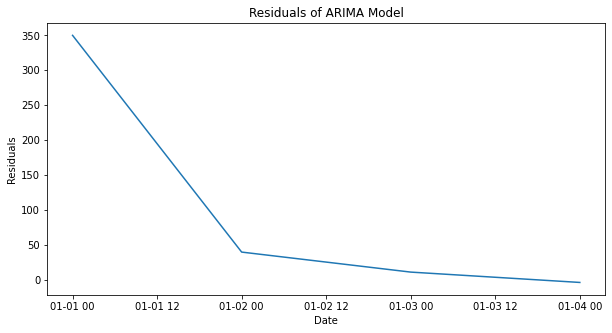

In [10]:
# Plot the residuals of the fitted model
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()